In [7]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
import pickle 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [2]:
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')

In [8]:
train.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,...,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean
0,0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,...,6.0,0.857143,2.0,0.285714,133.0,19.000000,154.0,22.000000,35323.665,5046.237857
1,1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,...,1.0,0.250000,1.0,0.250000,19.0,4.750000,19.0,4.750000,5595.883,1398.970750
2,2,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,...,1.0,0.333333,1.0,0.333333,33.0,11.000000,42.0,14.000000,8137.030,2712.343333
3,3,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,...,6.0,1.000000,0.0,0.000000,88.0,14.666667,100.0,16.666667,22585.123,3764.187167
4,4,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,...,5.0,0.833333,7.0,1.166667,136.0,22.666667,147.0,24.500000,36410.153,6068.358833


In [9]:
train = train.drop('Unnamed: 0',axis=1)
test = test.drop('Unnamed: 0',axis=1)

In [10]:
train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,149,...,6.0,0.857143,2.0,0.285714,133.0,19.000000,154.0,22.000000,35323.665,5046.237857
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,149,...,1.0,0.250000,1.0,0.250000,19.0,4.750000,19.0,4.750000,5595.883,1398.970750
2,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,149,...,1.0,0.333333,1.0,0.333333,33.0,11.000000,42.0,14.000000,8137.030,2712.343333
3,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,149,...,6.0,1.000000,0.0,0.000000,88.0,14.666667,100.0,16.666667,22585.123,3764.187167
4,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,2.0,9.0,20050406.0,38,30,149,...,5.0,0.833333,7.0,1.166667,136.0,22.666667,147.0,24.500000,36410.153,6068.358833


In [11]:
cols = [c for c in train.columns if c not in ['is_churn','msno']]

In [12]:
X_train,X_cv,Y_train,Y_cv = train_test_split(train[cols],train['is_churn'],test_size=0.3,stratify=train['is_churn'])

In [13]:
print(f'Train data size = {X_train.shape} ,{Y_train.shape}')
print(f'CV data size = {X_cv.shape},{Y_cv.shape}')

Train data size = (8909443, 33) ,(8909443,)
CV data size = (3818333, 33),(3818333,)


In [14]:
print(X_train.columns)

Index(['city', 'bd', 'gender', 'registered_via', 'registration_init_time',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'discount', 'is_discount',
       'membership_duration', 'date_min', 'date_max', 'num_25_sum',
       'num_25_count', 'num_25_mean', 'num_50_sum', 'num_50_mean',
       'num_75_sum', 'num_75_mean', 'num_985_sum', 'num_985_mean',
       'num_100_sum', 'num_100_mean', 'num_unq_sum', 'num_unq_mean',
       'total_secs_sum', 'total_secs_mean'],
      dtype='object')


In [15]:
def normalize(data):
    
    df = data.copy()
    for feature_name in df.columns:
        if feature_name!='gender' and feature_name!='registered_via' and feature_name!='payment_method_id' and feature_name!='is_auto_renew' and feature_name!='is_cancel' and feature_name!='city' and feature_name!='is_discount':
            max_val  = df[feature_name].max()
            min_val = df[feature_name].min()
            df[feature_name] = (data[feature_name]-min_val)/(max_val-min_val)
    
    return df



In [16]:
X_train = normalize(X_train)
X_cv = normalize(X_cv)

In [17]:
X_train.head()

,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,...,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean
3723841,1.0,0.609907,0.0,7.0,0.997044,41,0.066667,0.0495,0.0495,1,...,0.003249,0.001277,0.002608,0.003715,0.009293,0.007313,0.021259,0.009179,0.923077,0.837209
9265701,13.0,0.616680,2.0,9.0,0.995076,37,0.066667,0.0745,0.0745,1,...,0.009746,0.002873,0.006282,0.006712,0.010714,0.006323,0.030757,0.009960,0.923077,0.837209
4655587,1.0,0.609907,0.0,7.0,0.999493,41,0.066667,0.0495,0.0495,1,...,0.000191,0.001052,0.000119,0.002364,0.000160,0.001759,0.000279,0.001689,0.923077,0.837209
7029502,0.0,0.609907,0.0,0.0,0.000000,41,0.066667,0.0745,0.0745,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.923077,0.837209
64595,15.0,0.615325,1.0,9.0,0.996043,22,0.433333,0.4470,0.4470,0,...,0.017199,0.003640,0.012090,0.009274,0.054558,0.023119,0.082605,0.019205,0.923077,0.837209


In [18]:
X_cv.head()

,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,...,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean
7395976,4.0,0.617647,2.0,9.0,0.995067,34,0.066667,0.0745,0.0745,1,...,0.009087,0.004452,0.004572,0.005831,0.016957,0.011891,0.042162,0.050593,0.923077,0.896552
2166985,1.0,0.609907,0.0,7.0,0.999504,41,0.066667,0.0745,0.0745,1,...,0.001893,0.001987,0.001112,0.003040,0.006706,0.010077,0.013439,0.034557,0.923077,0.896552
12545126,1.0,0.609907,0.0,7.0,0.999052,41,0.066667,0.0495,0.0495,1,...,0.009277,0.004869,0.007785,0.010638,0.020753,0.015593,0.045617,0.058649,0.923077,0.896552
5430943,1.0,0.609907,0.0,7.0,0.997550,41,0.066667,0.0745,0.0745,1,...,0.006437,0.005256,0.002719,0.005779,0.004130,0.004828,0.010218,0.020436,0.923077,0.896552
9330501,1.0,0.609907,0.0,7.0,0.998041,41,0.066667,0.0745,0.0745,1,...,0.005112,0.002300,0.002595,0.003040,0.005151,0.003317,0.012092,0.013326,0.923077,0.896552


In [19]:
test

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,1.0,0.0,0.0,7.0,20140608.0,41,30,99,...,30.0,2.500000,80.0,6.666667,264.0,22.000000,307.0,25.583333,89992.430,7499.369167
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1.0,0.0,0.0,7.0,20140927.0,41,30,149,...,202.0,2.404762,199.0,2.369048,3464.0,41.238095,3623.0,43.130952,976483.723,11624.806226
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,18.0,21.0,1.0,7.0,20160315.0,41,30,149,...,62.0,1.476190,73.0,1.738095,653.0,15.547619,534.0,12.714286,200355.988,4770.380667
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,0,1.0,0.0,0.0,7.0,20160320.0,41,30,149,...,24.0,1.411765,25.0,1.470588,134.0,7.882353,279.0,16.411765,43810.515,2577.089118
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,0,1.0,0.0,0.0,9.0,20150807.0,38,30,149,...,18.0,0.642857,15.0,0.535714,970.0,34.642857,1013.0,36.178571,251368.052,8977.430429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907466,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0,4.0,24.0,1.0,7.0,20120306.0,41,30,99,...,72.0,1.200000,82.0,1.366667,3799.0,63.316667,3030.0,50.500000,1004013.303,16733.555050
907467,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0,0.0,0.0,0.0,0.0,0.0,41,30,99,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000
907468,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0,5.0,31.0,1.0,3.0,20150430.0,36,30,180,...,62.0,3.444444,61.0,3.388889,731.0,40.611111,752.0,41.777778,197050.868,10947.270444
907469,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0,9.0,0.0,0.0,7.0,20130515.0,29,30,180,...,50.0,0.793651,76.0,1.206349,3474.0,55.142857,2958.0,46.952381,804498.088,12769.810921


## Logistic Regression 

In [32]:
%%time 
alpha = [10 ** x for x in range(-3, 3)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(C=i)
    logisticR.fit(X_train,Y_train)
    predict_y = logisticR.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(Y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    print(f'Done for {i}')
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 0.001


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 0.01


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 0.1


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 1


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 10


C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done for 100
log_loss for c =  0.001 is 0.6931471805599467
log_loss for c =  0.01 is 0.6931471805599467
log_loss for c =  0.1 is 0.6931471805599467
log_loss for c =  1 is 0.6931471805599467
log_loss for c =  10 is 0.6931471805599467
log_loss for c =  100 is 0.6931471805599467
Wall time: 7min 16s


In [35]:
BestlogisticR =LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
BestlogisticR.fit(X_train,Y_train)

predict_y = BestlogisticR.predict_proba(X_train)
print ('log loss for train data',log_loss(Y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = BestlogisticR.predict_proba(X_cv)
print ('log loss for cv data',log_loss(Y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))

log loss for train data 0.6931585641334908
log loss for cv data 0.6931589340341807


In [39]:
pickle.dump(BestlogisticR,open('Models/Logisticr.sav','wb'))

## Decision Tree 


###### Getting log loss as 0.185 after using this on test 

In [42]:
%time 
classifier = DecisionTreeClassifier()
parameters = {'min_samples_split': [5, 10, 100, 500],'max_depth':[1, 5, 10, 50] }
clf = GridSearchCV(classifier,param_grid = parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, Y_train)

Wall time: 0 ns


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [45]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_split=500)

In [52]:
def normalize(data):
    
    df = data.copy()
    for feature_name in df.columns:
        max_val  = df[feature_name].max()
        min_val = df[feature_name].min()
        df[feature_name] = (data[feature_name]-min_val)/(max_val-min_val)
    
    return df

X_train = normalize(X_train)
X_cv = normalize(X_cv)
    
    

In [14]:
%%time 
bestClassifier = DecisionTreeClassifier(max_depth=50,min_samples_split=500)
bestClassifier.fit(X_train,Y_train)

Wall time: 17min 47s


DecisionTreeClassifier(max_depth=50, min_samples_split=500)

In [16]:
predict_y = bestClassifier.predict_proba(X_train)
print ('log loss for train data',log_loss(Y_train, predict_y))
predict_y = bestClassifier.predict_proba(X_cv)
print ('log loss for cv data',log_loss(Y_cv, predict_y))


log loss for train data 0.06501904431136293
log loss for cv data 0.13169859917851537


In [17]:
pickle.dump(bestClassifier,open('Models/DecisionTree.sav','wb'))

In [35]:
a = normalize(test[cols])

In [36]:
Y_test_pred = bestClassifier.predict_proba(a)
Y_test_pred = Y_test_pred.clip(0.05,0.95)
test['is_churn'] = Y_test_pred
test[['msno','is_churn']].to_csv('trial_submission',index=False)

In [39]:
test[['msno','is_churn']].to_csv('trial_submission.csv',index=False)

In [40]:


a = pd.read_csv('trial_submission.csv')
a.head()

,msno,is_churn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.050000
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.050000
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.050000
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,0.050000
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,0.494845



## XGBoost 

###### I am getting log loss as 0.184 using this on test 

In [16]:
from sklearn.metrics import log_loss

In [17]:
dtrain = xgb.DMatrix(X_train,label=Y_train)
dcv = xgb.DMatrix(X_cv,Y_cv)

In [26]:
%%time 
params = {
        
        'eta':0.3,
        'min_child_weight':1,
        'gamma': 0.4,
        'subsample': 1,
        'max_depth':6,
        'eval_metric':'logloss',
        'tree_method':'exact'
        }


xgb_model = xgb.train(
    
    params,
    dtrain,
    evals = [(dcv,"CV_DATA")],
    early_stopping_rounds = 10

)



[0]	CV_DATA-logloss:0.45887
Will train until CV_DATA-logloss hasn't improved in 10 rounds.
[1]	CV_DATA-logloss:0.32347
[2]	CV_DATA-logloss:0.24159
[3]	CV_DATA-logloss:0.18944
[4]	CV_DATA-logloss:0.15406
[5]	CV_DATA-logloss:0.13143
[6]	CV_DATA-logloss:0.11568
[7]	CV_DATA-logloss:0.10503
[8]	CV_DATA-logloss:0.09712
[9]	CV_DATA-logloss:0.09163
Wall time: 1min 39s


In [19]:
y_pred_test = xgb_model.predict(xgb.DMatrix(test[cols]))

In [ ]:
y_pred_test = y_pred_test.clip(0.01,0.99)
test['is_churn']= y_pred_test
test[['msno','is_churn']].to_csv('submissionx.csv',index=False)

In [24]:
import shap 

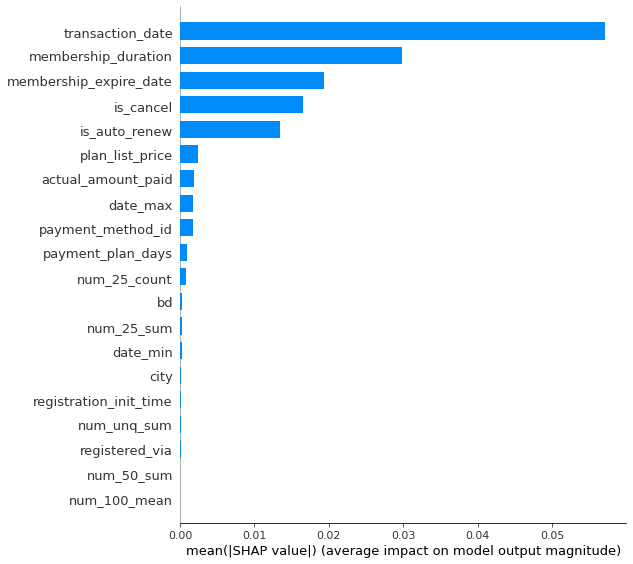

In [25]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_cv)
shap.summary_plot(shap_values, X_cv, plot_type="bar")

In [ ]:
%%time 
xgm = xgb.XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'tree_method':'exact'
        }
clf = RandomizedSearchCV(xgm,params,cv=5,n_jobs=1,n_iter=100)
clf.fit(X_train,Y_train)



In [35]:
best_params = clf.best_params_
best_score = clf.best_score_

In [34]:
best_params

{'tree_method': 't',
 'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 3,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

In [40]:
best_xgm_model = xgb.XGBClassifier(tree_method ='exact',subsample=0.6,
 min_child_weight=10,
 max_depth= 3,
 gamma= 1.5,
 colsample_bytree= 0.8)

In [42]:
%%time 
best_xgm_model.fit(X_train,Y_train)

Wall time: 10min 20s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred_test = best_xgm_model.predict(X_cv)
log_loss(Y_cv,y_pred_test)

1.2027625035475906

### LightBGM 

In [4]:
import lightgbm as gbm 

In [22]:
model = gbm.LGBMClassifier()

In [24]:
model.fit(X_train,Y_train)

LGBMClassifier()

In [25]:
y_pred_cv = model.predict_proba(X_cv)
log_loss(Y_cv,y_pred_cv)

0.1035937523314645

In [27]:
pickle.dump(model,open('Models/LightBGM.sav','wb'))

In [35]:
Decision_tree = pickle.load(open('Models/DecisionTree.sav', 'rb'))
Logistic_reg = LogisticRegression()
XGboost = pickle.load(open('Models/XGBoost.sav','rb'))
LightBGM = pickle.load(open('Models/LightBGM.sav','rb'))

In [41]:
Logistic_reg.fit(X_train,Y_train)

C:\Users\Admin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
sclf = StackingClassifier(classifiers=[Decision_tree,XGboost,LightBGM],
                         meta_classifier=Logistic_reg)

In [43]:
sclf 

StackingClassifier(classifiers=[DecisionTreeClassifier(max_depth=50,
                                                       min_samples_split=500),
                                DecisionTreeClassifier(max_depth=50,
                                                       min_samples_split=500),
                                LGBMClassifier()],
                   meta_classifier=LogisticRegression())

In [44]:
sclf.fit(X_train,Y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(max_depth=50,
                                                       min_samples_split=500),
                                DecisionTreeClassifier(max_depth=50,
                                                       min_samples_split=500),
                                LGBMClassifier()],
                   meta_classifier=LogisticRegression())

In [72]:
y_pred_cv  = sclf.predict_proba(X_cv)
print(y_pred_cv)

[[0.97960155 0.02039845]
 [0.97960155 0.02039845]
 [0.97960155 0.02039845]
 ...
 [0.55255462 0.44744538]
 [0.97960155 0.02039845]
 [0.97960155 0.02039845]]


In [46]:
log_loss(Y_cv,y_pred_cv) 

0.12717710687001554

In [67]:
y_pred_test = sclf.predict_proba(test[cols])

In [71]:
y_pred_test

array([[0.08810978, 0.91189022],
       [0.08810978, 0.91189022],
       [0.08810978, 0.91189022],
       ...,
       [0.08810978, 0.91189022],
       [0.08810978, 0.91189022],
       [0.08810978, 0.91189022]])

In [73]:
test['is_churn'] = y_pred_test
test[['msno','is_churn']].to_csv('submission3.csv',index=False)

In [74]:
a = pd.read_csv('submission3.csv')

In [75]:
a

,msno,is_churn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.08811
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.08811
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.08811
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,0.08811
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,0.08811
...,...,...
907466,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0.08811
907467,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0.08811
907468,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0.08811
907469,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0.08811
